In [30]:
# Test01 : 0.953356119490494

# Test02 {'grow_policy': 'lossguide', 'n_estimators': 884, 'learning_rate': 0.02094454919623795, 'gamma': 0.43310283194445315, 'subsample': 0.8241114159990148, 'colsample_bytree': 0.4604805638599247, 'max_depth': 3, 'min_child_weight': 6, 'reg_lambda': 1.588899068975288e-08, 'reg_alpha': 1.1166323197887553e-07}. Best is trial 29 with value: 0.9047921671166457.
#0.9438335704734249

#Test03 {'grow_policy': 'depthwise', 'n_estimators': 941, 'learning_rate': 0.019761611796128387, 'gamma': 0.273437747265095, 'subsample': 0.8240560571034576, 'colsample_bytree': 0.4115236844325919, 'max_depth': 3, 'min_child_weight': 2, 'reg_lambda': 4.268013260440379e-09, 'reg_alpha': 0.0002730493609398887}. Best is trial 67 with value: 0.9049037151323628.
#0.944625949274367

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

train = pd.read_csv("../Data/train.csv")

train = train.drop("id", axis = 1)

defect_counts = train[["Pastry","Z_Scratch","K_Scatch","Stains","Dirtiness","Bumps","Other_Faults"]].sum(axis=1)
train = train[defect_counts==1]

train['target'] = train[["Pastry","Z_Scratch","K_Scatch","Stains","Dirtiness","Bumps","Other_Faults"]].apply(lambda row: row.idxmax(), axis=1)
train = train.drop(["Pastry","Z_Scratch","K_Scatch","Stains","Dirtiness","Bumps","Other_Faults"],axis = 1)

label_map = {'Pastry': 0, 'Z_Scratch': 1, 'K_Scatch': 2, 'Stains': 3, 'Dirtiness': 4, 'Bumps': 5, 'Other_Faults': 6}
train['target'] = train['target'].map(label_map)

In [49]:
train['TypeOfSteel'] = train.apply(lambda row: 0 if row['TypeOfSteel_A300'] == 1 else (1 if row['TypeOfSteel_A400'] == 1 else None), axis=1)
train = train.drop(["TypeOfSteel_A300", "TypeOfSteel_A400"], axis = 1)
train.dropna(inplace=True)

In [50]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

X = train.drop("target", axis = 1)
y = train["target"]



model = XGBClassifier(
    objective='multi:softmax',
    grow_policy = 'depthwise',
    n_estimators = 941,
    learning_rate = 0.019761611796128387,
    gamma = 0.273437747265095,
    subsample = 0.8240560571034576,
    colsample_bytree = 0.4115236844325919,
    max_depth = 3,
    min_child_weight = 2,
    reg_lambda = 4.268013260440379e-09,
    reg_alpha = 0.0002730493609398887,


)

model.fit(X, y)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4115236844325919, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.273437747265095,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints=None, learning_rate=0.019761611796128387,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=941, n_jobs=None,
              num_parallel_tree=None, objective='multi:softmax', ...)

In [51]:
y_score = model.predict_proba(X)
y_score.shape

(18361, 7)

In [52]:
from sklearn.metrics import roc_auc_score

micro_roc_auc_ovr = roc_auc_score(
    y,
    y_score,
    multi_class="ovr",
    average="micro",
)
micro_roc_auc_ovr

0.944625949274367

In [53]:
test = pd.read_csv("../Data/test.csv")

testid = test["id"]

test['TypeOfSteel'] = test.apply(lambda row: 0 if row['TypeOfSteel_A300'] == 1 else (1 if row['TypeOfSteel_A400'] == 1 else None), axis=1)
test = test.drop(["TypeOfSteel_A300", "TypeOfSteel_A400"], axis = 1)

test["TypeOfSteel"] = test["TypeOfSteel"].fillna(1)
testX = test.drop("id", axis = 1)

In [54]:
y_test_score = model.predict_proba(testX)

In [55]:
testPred = pd.DataFrame(y_test_score)
testPred.columns = ["Pastry","Z_Scratch","K_Scatch","Stains","Dirtiness","Bumps","Other_Faults"]
testPred

,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0.505059,0.000831,0.003876,0.000044,0.013611,0.153075,0.323504
1,0.269598,0.025519,0.014073,0.000133,0.187363,0.167009,0.336305
2,0.002777,0.053764,0.042015,0.000306,0.009547,0.325956,0.565636
3,0.162930,0.001497,0.000597,0.001544,0.017058,0.378760,0.437613
4,0.002140,0.001552,0.000871,0.002823,0.007168,0.649959,0.335486
...,...,...,...,...,...,...,...
12809,0.070392,0.121691,0.003996,0.000096,0.032705,0.276449,0.494671
12810,0.165185,0.005622,0.027520,0.011540,0.146642,0.224880,0.418611
12811,0.000240,0.000223,0.944392,0.000031,0.000235,0.000690,0.054190
12812,0.398393,0.012129,0.026744,0.000076,0.076370,0.159937,0.326351


In [56]:
ffile = testPred
ffile["id"] = testid

last_column = ffile.iloc[:, -1]
ffile = ffile.iloc[:, :-1]
ffile = pd.concat([last_column, ffile], axis=1)
ffile

,id,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,19219,0.505059,0.000831,0.003876,0.000044,0.013611,0.153075,0.323504
1,19220,0.269598,0.025519,0.014073,0.000133,0.187363,0.167009,0.336305
2,19221,0.002777,0.053764,0.042015,0.000306,0.009547,0.325956,0.565636
3,19222,0.162930,0.001497,0.000597,0.001544,0.017058,0.378760,0.437613
4,19223,0.002140,0.001552,0.000871,0.002823,0.007168,0.649959,0.335486
...,...,...,...,...,...,...,...,...
12809,32028,0.070392,0.121691,0.003996,0.000096,0.032705,0.276449,0.494671
12810,32029,0.165185,0.005622,0.027520,0.011540,0.146642,0.224880,0.418611
12811,32030,0.000240,0.000223,0.944392,0.000031,0.000235,0.000690,0.054190
12812,32031,0.398393,0.012129,0.026744,0.000076,0.076370,0.159937,0.326351


In [57]:
ffile.to_csv('../Submissions/test03.csv', index=False)

In [58]:
y_test_score

array([[5.0505906e-01, 8.3107396e-04, 3.8764994e-03, ..., 1.3610721e-02,
        1.5307473e-01, 3.2350376e-01],
       [2.6959798e-01, 2.5519172e-02, 1.4073047e-02, ..., 1.8736316e-01,
        1.6700856e-01, 3.3630502e-01],
       [2.7769974e-03, 5.3763665e-02, 4.2014886e-02, ..., 9.5471209e-03,
        3.2595557e-01, 5.6563586e-01],
       ...,
       [2.3952808e-04, 2.2324064e-04, 9.4439185e-01, ..., 2.3524466e-04,
        6.8972993e-04, 5.4189768e-02],
       [3.9839333e-01, 1.2128614e-02, 2.6744451e-02, ..., 7.6369666e-02,
        1.5993732e-01, 3.2635072e-01],
       [1.5049204e-03, 4.0658922e-03, 8.9765525e-01, ..., 5.0100207e-04,
        1.4950429e-03, 9.4715163e-02]], dtype=float32)

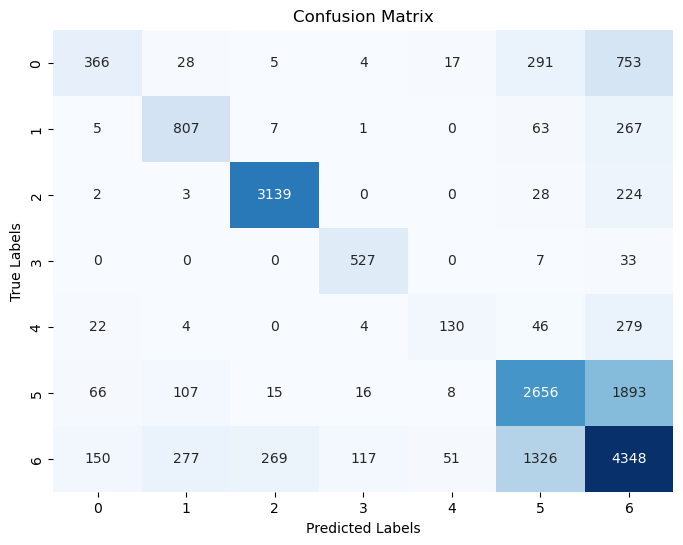

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X)

conf_matrix = confusion_matrix(y, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()